In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # 获取数据集

In [2]:
train_dir = 'hotdog/train'
test_dir = 'hotdog/test'

In [3]:
# 获取训练集数据
train_dir = pathlib.Path(train_dir)
train_count = len(list(train_dir.glob('*/*.jpg')))

In [4]:
# 获取测试集数据
test_dir = pathlib.Path(test_dir)
test_count = len(list(test_dir.glob('*/*.jpg')))

# #图像处理

In [5]:
# 创建imageDataGenerator进行图像处理
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
# 设置参数
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [7]:
# 获取训练数据
train_data_gen = image_generator.flow_from_directory(directory=str(train_dir), batch_size=BATCH_SIZE,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH), 
                                                    shuffle=True)

Found 2000 images belonging to 2 classes.


In [8]:
# 获取测试数据
test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                   batch_size=BATCH_SIZE,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   shuffle=True)

Found 800 images belonging to 2 classes.


# #显示图像

In [10]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(15):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        plt.axis('off')

In [11]:
# 随机选择一个batch的图像 
image_batch, label_batch = next(train_data_gen)

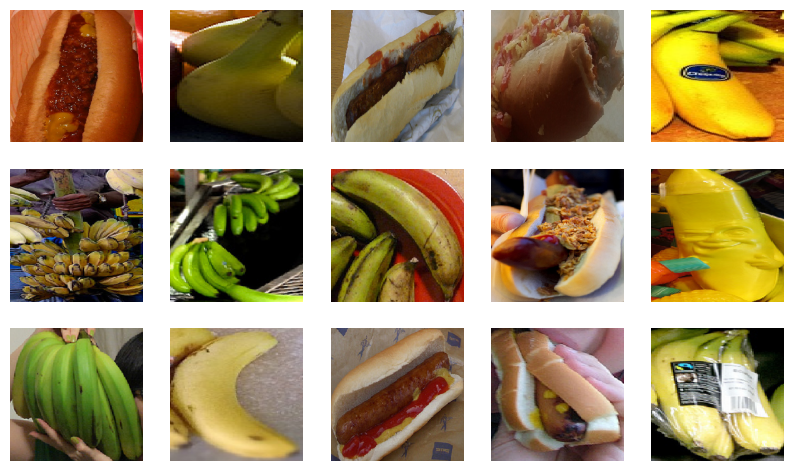

In [12]:
# 图像显示
show_batch(image_batch, label_batch)

# # 预模型

In [13]:
# 加载预训练模型(ResNet50)
ResNet50 = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3))

102967424/102967424 [==============================] - 21s 0us/step


In [14]:
# 设置所有层不可训练
for layer in ResNet50.layers:
    layer.trainable = False

In [15]:
# 设置模型
net = tf.keras.models.Sequential()

In [16]:
# 预训练模型
net.add(ResNet50)

In [17]:
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(2, activation='softmax'))

# #模型编译

In [18]:
# 模型编译：指定优化器，损失函数和评价指标
net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # 模型训练

In [19]:
# 模型训练：指定数据，每一个epoch中只运行10个迭代，指定验证数据集
history = net.fit(train_data_gen, steps_per_epoch=10, epochs=3, validation_data=test_data_gen, validation_steps=10)

Epoch 1/3


2024-08-16 16:16:26.214410: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 18s 2s/step - loss: 0.6934 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5031
Epoch 2/3
10/10 [==============================] - 15s 2s/step - loss: 0.6930 - accuracy: 0.5156 - val_loss: 0.6930 - val_accuracy: 0.5125
Epoch 3/3
10/10 [==============================] - 15s 2s/step - loss: 0.6934 - accuracy: 0.4938 - val_loss: 0.6929 - val_accuracy: 0.5156
